In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import itertools
import warnings
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
warnings.filterwarnings("ignore")

In [25]:
df=pd.read_excel("D:\\DATASETS\\GOAT.xlsx",parse_dates=['date'])

In [27]:
df.head()

,district,date,rain,temp_min,temp_max,humidity_min,humidity_max,wind_speed_max,wind_speed_min
0,Adilabad,2018-01-01,0.0,10.4,29.7,41.8,83.8,0.0,5.7
1,Adilabad,2018-01-02,0.0,11.2,34.8,29.8,74.6,0.0,4.8
2,Adilabad,2018-01-03,0.0,17.3,38.0,31.8,71.5,0.0,3.4
3,Adilabad,2018-01-04,0.0,27.3,41.0,24.9,75.6,0.0,7.7
4,Adilabad,2018-01-05,0.0,28.7,43.2,27.7,48.9,0.0,13.5


In [28]:
df=df.resample('M',on='date').mean()

In [29]:
df

,rain,temp_min,temp_max,humidity_min,humidity_max,wind_speed_max,wind_speed_min
date,,,,,,,
2018-01-31,1.151613,15.241935,33.187097,40.567742,79.909677,0.051613,6.896774
2018-02-28,1.350000,19.053571,34.964286,43.907143,80.328571,0.007143,6.846429
2018-03-31,0.370968,21.493548,36.445161,39.716129,72.570968,0.003226,6.293548
2018-04-30,0.093333,24.910000,38.920000,37.963333,68.506667,0.030000,8.373333
2018-05-31,1.532258,26.441935,40.070968,39.064516,71.164516,0.296774,9.967742
2018-06-30,3.586667,24.420000,35.080000,55.486667,82.226667,0.440000,10.196667
2018-07-31,6.858065,23.596774,31.577419,65.890323,87.141935,0.529032,9.464516
2018-08-31,9.422581,22.738710,31.145161,68.932258,92.670968,0.593548,8.354839
2018-09-30,4.303333,22.630000,33.913333,53.756667,91.666667,0.063333,8.320000


In [32]:
df['wind_speed_min'].replace(np.nan,0,inplace=True)

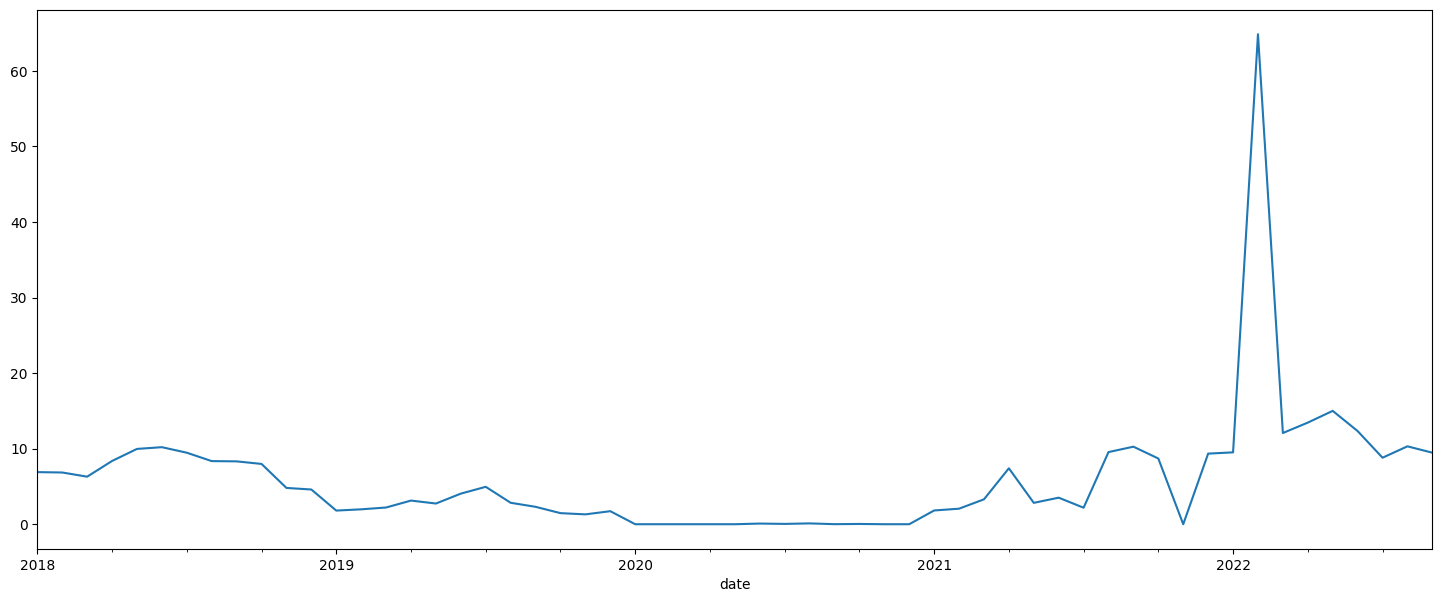

In [33]:
df['wind_speed_min'].plot(figsize=(18,7))
plt.show()

In [34]:
adfuller(df['wind_speed_min'])

(-3.2914669503628926,
 0.015264237485025959,
 1,
 55,
 {'1%': -3.5552728880540942,
  '5%': -2.9157312396694217,
  '10%': -2.5956695041322315},
 333.54461521148227)

In [35]:
p = range(0, 3)
d = range(1,2)
q = range(0, 4)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df['wind_speed_min'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            )
            results = mod.fit(method = 'powell')
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Optimization terminated successfully.
         Current function value: 3.014941
         Iterations: 2
         Function evaluations: 37
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:345.70328454988663
Optimization terminated successfully.
         Current function value: 3.014286
         Iterations: 2
         Function evaluations: 42
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:347.6286326845905
Optimization terminated successfully.
         Current function value: 3.014280
         Iterations: 2
         Function evaluations: 62
ARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:349.6279620393485
Optimization terminated successfully.
         Current function value: 3.014264
         Iterations: 2
         Function evaluations: 83
ARIMA(0, 1, 0)x(0, 1, 3, 12)12 - AIC:351.62607273286824
Optimization terminated successfully.
         Current function value: 3.014304
         Iterations: 2
         Function evaluations: 41
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:347.63069280530317
Optimization terminated successfully.

ARIMA(0, 1, 3)x(1, 1, 2, 12)12 - AIC:338.1517588518484
Optimization terminated successfully.
         Current function value: 2.843419
         Iterations: 2
         Function evaluations: 163
ARIMA(0, 1, 3)x(1, 1, 3, 12)12 - AIC:340.14978773077024
Optimization terminated successfully.
         Current function value: 2.843437
         Iterations: 3
         Function evaluations: 186
ARIMA(0, 1, 3)x(2, 1, 0, 12)12 - AIC:336.15183340085053
Optimization terminated successfully.
         Current function value: 2.843438
         Iterations: 2
         Function evaluations: 140
ARIMA(0, 1, 3)x(2, 1, 1, 12)12 - AIC:338.1519107429258
Optimization terminated successfully.
         Current function value: 2.843438
         Iterations: 2
         Function evaluations: 166
ARIMA(0, 1, 3)x(2, 1, 2, 12)12 - AIC:340.1519097356973
Optimization terminated successfully.
         Current function value: 2.843419
         Iterations: 2
         Function evaluations: 183
ARIMA(0, 1, 3)x(2, 1, 3, 12)12 - 

Optimization terminated successfully.
         Current function value: 2.843434
         Iterations: 2
         Function evaluations: 143
ARIMA(1, 1, 3)x(0, 1, 2, 12)12 - AIC:338.15142274592046
Optimization terminated successfully.
         Current function value: 2.843417
         Iterations: 2
         Function evaluations: 163
ARIMA(1, 1, 3)x(0, 1, 3, 12)12 - AIC:340.1495946119124
Optimization terminated successfully.
         Current function value: 2.843757
         Iterations: 2
         Function evaluations: 121
ARIMA(1, 1, 3)x(1, 1, 0, 12)12 - AIC:336.1882528369828
Optimization terminated successfully.
         Current function value: 2.843757
         Iterations: 2
         Function evaluations: 142
ARIMA(1, 1, 3)x(1, 1, 1, 12)12 - AIC:338.1882483125358
Optimization terminated successfully.
         Current function value: 2.843435
         Iterations: 2
         Function evaluations: 163
ARIMA(1, 1, 3)x(1, 1, 2, 12)12 - AIC:340.15158399716194
Optimization terminated successfu

ARIMA(2, 1, 2)x(2, 1, 0, 12)12 - AIC:338.14225343242146
Optimization terminated successfully.
         Current function value: 2.843352
         Iterations: 2
         Function evaluations: 163
ARIMA(2, 1, 2)x(2, 1, 1, 12)12 - AIC:340.142099390528
Optimization terminated successfully.
         Current function value: 2.843352
         Iterations: 2
         Function evaluations: 184
ARIMA(2, 1, 2)x(2, 1, 2, 12)12 - AIC:342.1420984244607
Optimization terminated successfully.
         Current function value: 2.843331
         Iterations: 2
         Function evaluations: 213
ARIMA(2, 1, 2)x(2, 1, 3, 12)12 - AIC:344.13971213102866
Optimization terminated successfully.
         Current function value: 2.842485
         Iterations: 4
         Function evaluations: 256
ARIMA(2, 1, 3)x(0, 1, 0, 12)12 - AIC:336.0432891420805
Optimization terminated successfully.
         Current function value: 2.842473
         Iterations: 4
         Function evaluations: 291
ARIMA(2, 1, 3)x(0, 1, 1, 12)12 - A

In [36]:
train=df[:len(df)*80//100]
test=df[len(df)*80//100:]

In [37]:
model=sm.tsa.statespace.SARIMAX(train['wind_speed_min'],order=(0,1,1),seasonal_order=(0,1,0,12))

In [38]:
model_fit=model.fit()
predictions=model_fit.predict(start=test.index[0],end=test.index[-1])

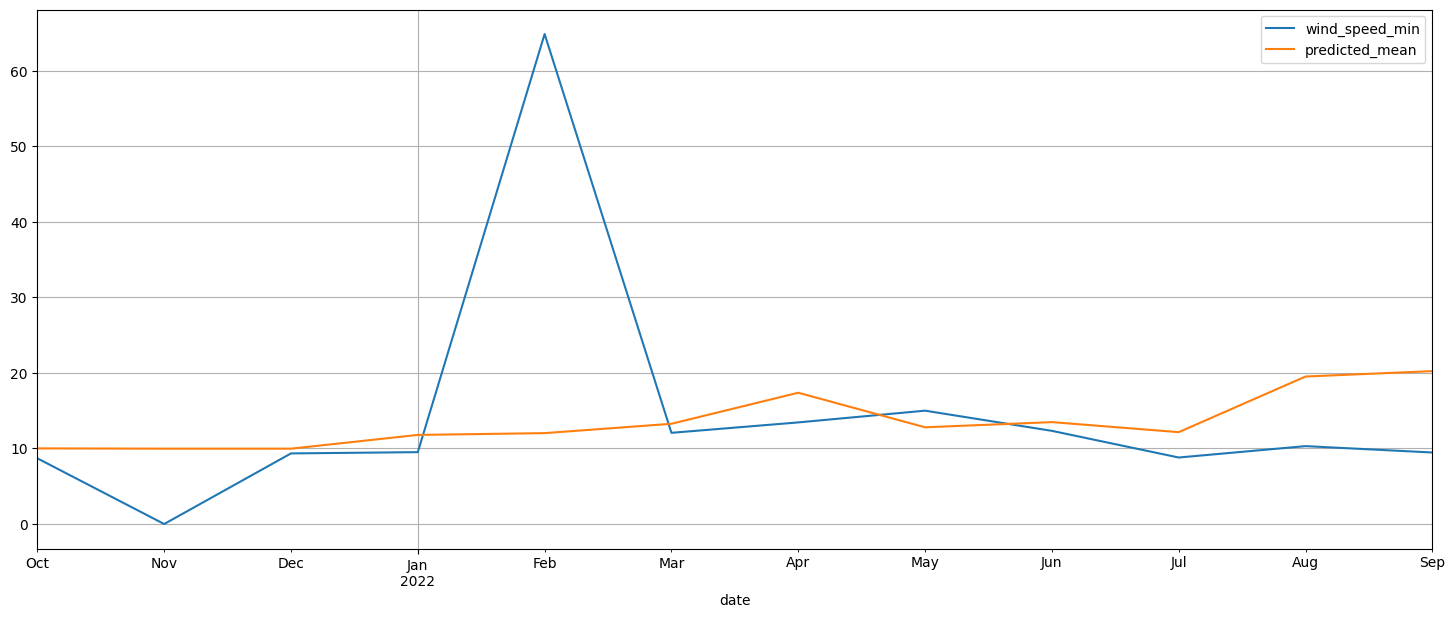

In [39]:
test['wind_speed_min'].plot(figsize=(18,7),legend=True)
predictions.plot(legend=True)
plt.grid()

In [40]:
np.sqrt(mean_squared_error(test['wind_speed_min'],predictions))

16.156892150808016

In [41]:
future=pd.DataFrame(pd.date_range("2022-10-01","2023-09-30",freq='MS'),columns=['date'])
future.set_index('date',inplace=True)
Forecast=model_fit.predict(start=future.index[0],end=future.index[-1])

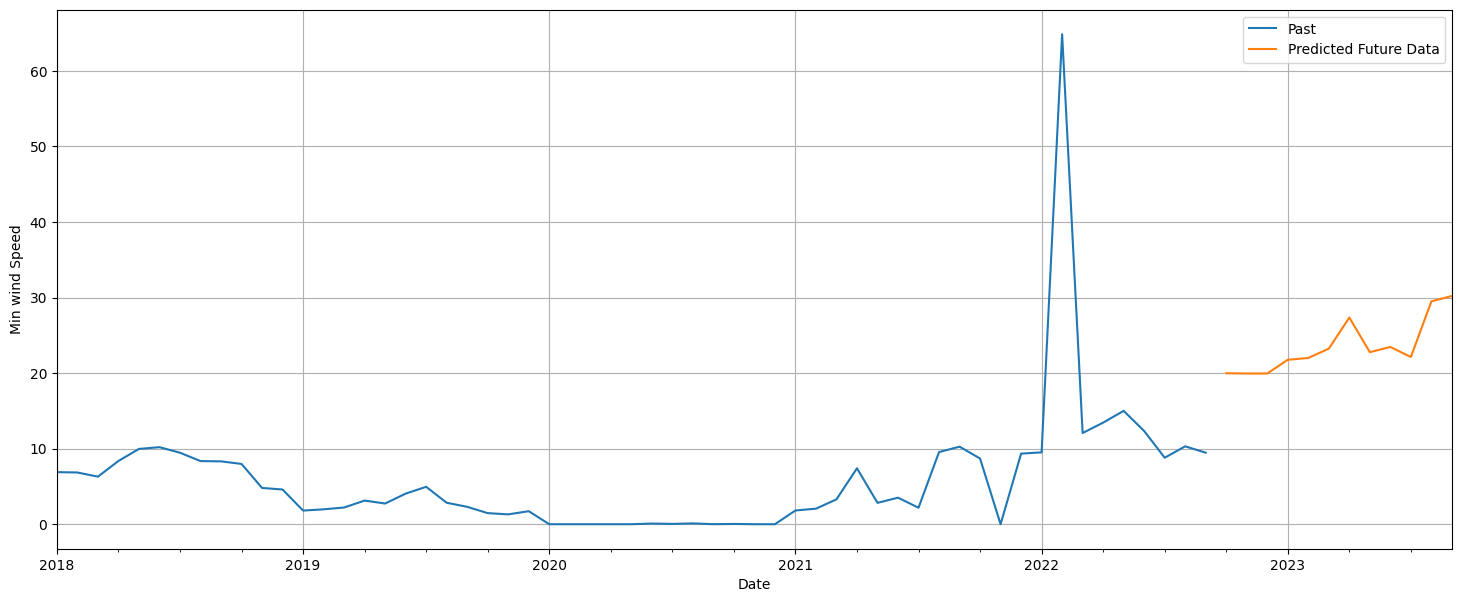

In [43]:
ax=df['wind_speed_min'].plot(label="Past Data")
Forecast.plot(ax=ax,label="Predicted Future data",figsize=(18,7))
plt.xlabel("Date")
plt.ylabel("Min wind Speed")
plt.legend(["Past","Predicted Future Data"])
plt.grid()
plt.show()